# Actividad 2.8 — k-NN Regression (KNeighborsRegressor)

Predecir `petal_length` a partir de las otras tres características del dataset Iris.

Partición: 90% entrenamiento / 10% validación. Métrica principal: coeficiente de determinación R².

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Asegura que las figuras se muestren en Jupyter
%matplotlib inline

# ------------------------------------------------
# Cargar dataset Iris desde la URL (misma fuente del ejemplo)
# ------------------------------------------------
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)

print("Dimensiones originales del dataset:", df.shape)
print(df.head())

Dimensiones originales del dataset: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
# ----------------------------------------
# Preparar X (features) e y (target)
# Queremos predecir petal_length a partir de las otras tres características:
# features = ['sepal_length', 'sepal_width', 'petal_width']
# target = 'petal_length'
# ----------------------------------------
features = ['sepal_length', 'sepal_width', 'petal_width']
target = 'petal_length'

X = df[features].values
y = df[target].values

print("\nEjemplo de X (primeras filas):\n", df[features].head())
print("\nEjemplo de y (primeras filas):\n", df[target].head())


Ejemplo de X (primeras filas):
    sepal_length  sepal_width  petal_width
0           5.1          3.5          0.2
1           4.9          3.0          0.2
2           4.7          3.2          0.2
3           4.6          3.1          0.2
4           5.0          3.6          0.2

Ejemplo de y (primeras filas):
 0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64


In [3]:
# --------------------------
# Partición 90% train / 10% validation
# Usamos RANDOM_SEED = 10 como en el ejemplo proporcionado
# --------------------------
RANDOM_SEED = 10
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.10, random_state=RANDOM_SEED
)

print(f"\nTamaños: X_train={X_train.shape}, X_val={X_val.shape}")


Tamaños: X_train=(135, 3), X_val=(15, 3)


In [4]:
# --------------------------
# Pipeline: StandardScaler + KNeighborsRegressor
# n_neighbors = 5 por defecto
# --------------------------
n_neighbors = 5
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform'))
])

# Entrenamos
pipe.fit(X_train, y_train)

# Predicciones
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

In [5]:
# --------------------------
# Métricas: R2 principal + MSE/MAE
# --------------------------
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Resultados (n_neighbors={n_neighbors}):")
print(f"R² (train): {r2_train:.4f}")
print(f"R² (validación 10%): {r2_val:.4f}")
print(f"MSE (validación): {mse_val:.4f}")
print(f"MAE (validación): {mae_val:.4f}")

Resultados (n_neighbors=5):
R² (train): 0.9753
R² (validación 10%): 0.9738
MSE (validación): 0.0580
MAE (validación): 0.1920


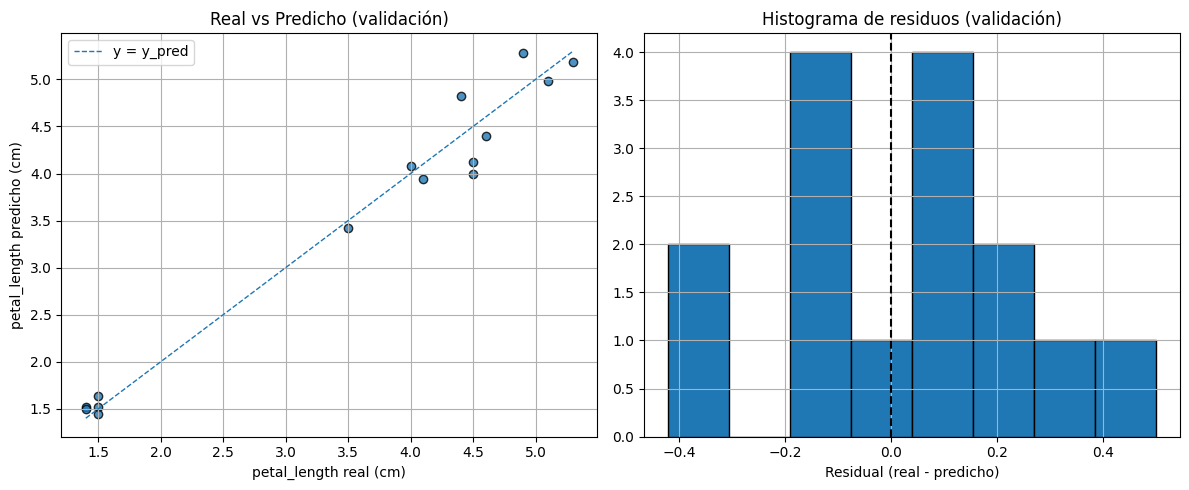

In [6]:
# --------------------------
# Gráficas: predicho vs real y residuos
# --------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Real vs predicho (validación)
axes[0].scatter(y_val, y_val_pred, edgecolors='k', alpha=0.8)
min_v = min(y_val.min(), y_val_pred.min())
max_v = max(y_val.max(), y_val_pred.max())
axes[0].plot([min_v, max_v], [min_v, max_v], ls='--', lw=1, label='y = y_pred')
axes[0].set_xlabel('petal_length real (cm)')
axes[0].set_ylabel('petal_length predicho (cm)')
axes[0].set_title('Real vs Predicho (validación)')
axes[0].legend()
axes[0].grid(True)

# Residuos
residuals = y_val - y_val_pred
axes[1].hist(residuals, bins=8, edgecolor='k')
axes[1].axvline(0, color='k', linestyle='--')
axes[1].set_xlabel('Residual (real - predicho)')
axes[1].set_title('Histograma de residuos (validación)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [7]:
# --------------------------
# Comparativa rápida de diferentes valores de k (opcional)
# --------------------------
ks = [1, 3, 5, 7, 9, 11]
results = []
for k in ks:
    p = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=k))])
    p.fit(X_train, y_train)
    yv = p.predict(X_val)
    results.append((k, r2_score(y_val, yv), mean_squared_error(y_val, yv)))

res_df = pd.DataFrame(results, columns=['k', 'R2_val', 'MSE_val']).sort_values('k')
print("\nComparativa rápida de k (validación 10%):")
print(res_df.to_string(index=False))

# Fin del notebook


Comparativa rápida de k (validación 10%):
 k   R2_val  MSE_val
 1 0.968678 0.069333
 3 0.980625 0.042889
 5 0.973786 0.058027
 7 0.978783 0.046966
 9 0.988998 0.024354
11 0.991694 0.018386
